In [31]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import subprocess
import scipy as sc
from itertools import product

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.figsize": (4, 3.5),
    "text.latex.preamble": "\n".join([
        r"\usepackage[utf8]{inputenc}",
        r"\usepackage[T1]{fontenc}",
        r"\usepackage[detect-all,locale=FR]{siunitx}",
    ]),
    'lines.markersize': 10,
    'lines.color': 'grey',
    'scatter.marker': '+',
    'errorbar.capsize': 3,
    'savefig.bbox': 'tight',
})

In [32]:
path = '../'
executable = 'bin/ex2'
export_path = path + 'rapport/figures/'
data_path = 'data/'
config_path = 'bin/'
config_name = 'excitation_smol'
config_ext = '.conf'

In [33]:
def stringify_dict(d: dict, sep=',') -> str:
    return sep.join(map(lambda a: str(a[0]) + "=" + str(a[1]), tuple(d.items())))

In [34]:
def run(config_file: str, output_file: str, params: dict = {}) -> None:
    # print(f"Running with config file {config_file}")
    options = stringify_dict(params, sep=' ')
    cmd = f"{path}{executable} {path}{config_file} output='{path}{output_file}' {options}"
    print(f"Running command `{cmd}`")
    subprocess.run(cmd, shell=True, stdout=subprocess.DEVNULL)
    # print("Done")

In [35]:
# nsteps = np.array([*range(500, 2001, 100)])

conf = {}
with open(path + config_path + config_name + config_ext, 'r') as f:
    lines = f.read().split('\n')

for line in lines:
    if not line:
        continue
    name, _, val, *_ = line.split(' ')
    name = name.strip()
    val = val.strip()
    try:
        conf[name] = float(val)
    except ValueError:
        conf[name] = val


nsteps = np.array([1000])
# nsimul = len(nsteps)  # Number of simulations to perform

omega0 = np.sqrt(conf['g']/conf['L'])
omega = 2*omega0

period_excit = 2*np.pi / omega
tFin = 200 * period_excit
print(tFin)

dt = tFin / nsteps

89.71402930932747


In [36]:
%%bash
cd .. && make clean && make

clang++ -o bin/ex2 src/Ex2_2024_student.cpp -std=c++17 -Wall -Wextra -O2 


In [37]:
params_variations = {
    'nsteps': nsteps,
    'Omega': [omega],
    # 'theta0': [np.pi/6],
    # 'thetadot0': [2],
}
all_params = tuple(
    {a: b for a, b in zip(params_variations.keys(), c)} for c in product(*params_variations.values())
)

# Run simulations
outputs = []  # List to store output file names
for params in all_params:
    output_file = f"{data_path}{config_name},{stringify_dict(params)}.out"
    outputs.append(output_file)
    run(f'{config_path}{config_name}{config_ext}', output_file, params)

Running command `../bin/ex2 ../bin/excitation_smol.conf output='../data/excitation_smol,nsteps=1000,Omega=14.007141035914502.out' nsteps=1000 Omega=14.007141035914502`


In [38]:
# Filter stuff
file_and_params = []
all_data = {}

for file, params in zip(outputs, all_params):
    file_and_params.append((file, params))
    data = np.loadtxt(path + file)
    all_data[file] = (params, np.copy(data))

# Plots!

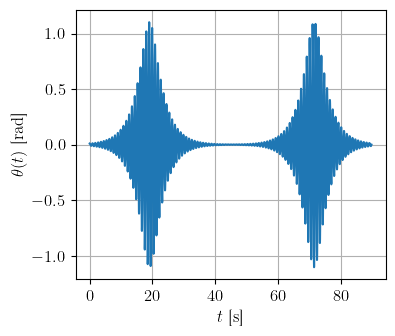

In [39]:
for (params, data) in all_data.values():
    t, theta, thetadot = data[:,0], data[:,1], data[:,2]
    plt.plot(t, theta)

plt.xlabel(r"$t$ [s]")
plt.ylabel(r"$\theta(t)$ [rad]")
plt.grid()

plt.savefig(export_path + 'excitation_smol_traj.pdf')

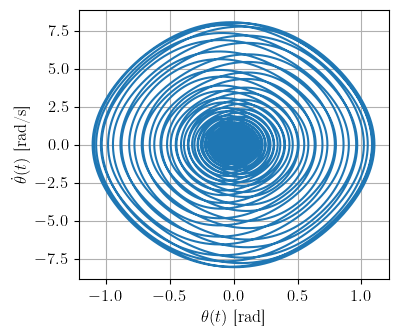

In [40]:
for (params, data) in all_data.values():
    t, theta, thetadot = data[:,0], data[:,1], data[:,2]
    plt.plot(theta, thetadot)

plt.xlabel(r"$\theta(t)$ [rad]")
plt.ylabel(r"$\dot\theta(t)$ [rad/s]")
plt.grid()
